In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from dateutil import parser
import matplotlib.dates as mdates
from scipy import stats
import seaborn as snb
snb.set_style('white')
import matplotlib.lines as mlines
import pydsd
from matplotlib.colors import LogNorm
import pywt
#from fitter import Fitter
from sklearn.metrics import mean_squared_error
import datetime
#import itur
#import itur.models.itu676 as itu676
#import itur.models.itu835 as itu835
#import atmos

### Combinining raw data and create Monthly files

In [5]:
os.chdir(r'G:\My Drive\PhD_related\Article_4\data_analysis\raw_data\mtview\online_retrieval')

file_list=set(glob.glob('*2019*.dat'))-set(glob.glob('*DataTableInfo*.dat'))-set(glob.glob('*DebugLog*.dat'))
df_mtview=pd.DataFrame()
for fname in file_list:
    print fname
    mtview=pd.read_csv(fname,low_memory=False,skiprows=8,header=None,index_col=[0],parse_dates=True,skip_blank_lines=True)
    df_mtview=df_mtview.append(mtview,sort=True)

CR1000 Melbourne MtView_Data30sec_2019_03_08_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_02_12_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_03_14_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_02_02_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_04_03_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_04_16_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_04_28_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_01_22_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_01_31_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_03_06_1356.dat
CR1000 Melbourne MtView_Data30sec_2019_04_30_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_01_11_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_01_20_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_02_15_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_01_13_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_02_19_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_04_10_1300.dat
CR1000 Melbourne MtView_Data30sec_2019_02_08_1300.dat
CR1000 Melbourne MtView_Data

In [6]:
dfgroup=df_mtview.groupby(df_mtview.index.month)
for i in range(1,5):
    print i
    dfgroup.get_group(i).to_csv('2019_'+str(i).zfill(2)+'_MtView_.csv')

1
2
3
4


## Merge raw data into a single file for further processing

In [ ]:
'''
Data Fields (Mt.View)
----------------------
Field4 - Avg Temperature
Field5- RH
Field 6- ???
Field 7 - Rain Total1
Field 8 - Rain Total2
Field 9-  Rain Avg
Field 10- Rain Total4
Field 11- Rain Total5
Field 12 - Rain Avg
Field 13- Wind Direction
Field 14- Wind Speed Avg
Field 15 - SR down
Field 16- SR UP
Field 17 - OTT Sensor SN
Field 24- Radar Reflectivity
Field 26 - Rain Intensity(mm/h)
Field 27 - Accumulated Rain Amount (mm)
Field 29-60 N(d) (1/m3*mm)
Field 61-92 V(d) Velocity
Field 93-1116 Raw data

'''

In [2]:
os.chdir(r'G:\My Drive\PhD_related\Article_4\data_analysis\raw_data\mtview')

In [3]:
file1=pd.read_csv('01_2018_06_2018.dat',low_memory=False,parse_dates=True,index_col=[0],skip_blank_lines=True,skiprows=4,header=None)

In [4]:
file2=pd.read_csv('07_2018_11_2018.dat',low_memory=False,parse_dates=True,index_col=[0],skip_blank_lines=True,skiprows=4,header=None)

In [5]:
file3=pd.read_csv('04_2019_09_2019.dat',low_memory=False,parse_dates=True,index_col=[0],skip_blank_lines=True,skiprows=4,header=None)

In [6]:
df_mtview=pd.DataFrame()
df_mtview=df_mtview.append(file1)
df_mtview=df_mtview.append(file2)
df_mtview=df_mtview.append(file3)
df_mtview=df_mtview.sort_index()
df_mtview=df_mtview[~df_mtview.index.duplicated(keep='first')]

In [7]:
del file1,file2,file3

In [9]:
df_mtview.head()

,1,2,3,4,5,6,7,8,9,10,...,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116
0,,,,,,,,,,,,,,,,,,,,,
2018-01-15 13:48:00,242349,21.36777,13.82958,17.3,84.4,1002.3,190.22,43010,0.0,0.2,...,0,0,0,0,0,0,0,0,0,0
2018-01-15 13:48:30,242350,21.34066,13.80745,17.3,84.8,1002.3,190.22,43010,0.0,0.2,...,0,0,0,0,0,0,0,0,0,0
2018-01-15 13:49:00,242351,21.31355,13.89596,17.3,84.8,1002.3,190.22,43010,0.0,0.2,...,0,0,0,0,0,0,0,0,0,0
2018-01-15 13:49:30,242352,21.28643,13.72447,17.2,84.6,1002.4,190.22,43010,0.0,0.2,...,0,0,0,0,0,0,0,0,0,0
2018-01-15 13:50:00,242353,21.25933,13.94022,17.2,84.6,1002.4,190.22,43010,0.0,0.2,...,0,0,0,0,0,0,0,0,0,0


## Extract Weather information

In [23]:
os.chdir(r'G:\My Drive\PhD_related\Article_4\data_analysis\raw_data\mtview')
flist=glob.glob('*MtView*.csv')
df_weather=pd.DataFrame()
for f in flist:
    print f
    df_mtview=pd.read_csv(f,parse_dates=True,index_col=[0],low_memory=False,header=None,skiprows=1)
    dfmtview=df_mtview[df_mtview.columns[[3,4,5,8,12,13,25,27]]]
    dfmtview.rename(columns={4:'AvgTemp',5:'RH',6:'Pressure',9:'RainIntensity',13:'WindDirection',14:'WindSpeed',26:'RainIntensityOTT',28:'Visibility'},inplace=True)
    df_weather=df_weather.append(dfmtview,sort=True)
df_weather.to_csv('RG_Mtview.csv')
del df_weather,df_mtview,dfmtview

2017_12_MtView.csv
2018_12_MtView_.csv
2019_01_MtView_.csv
2019_02_MtView_.csv
2019_03_MtView_.csv
2018_02_MtView.csv
2018_03_MtView.csv
2018_04_MtView.csv
2018_05_MtView.csv
2018_07_MtView.csv
2018_08_MtView.csv
2018_09_MtView.csv
2018_10_MtView.csv
2019_05_MtView.csv
2019_06_MtView.csv
2019_07_MtView.csv
2019_08_MtView.csv
2019_09_MtView.csv
2018_11_MtView(1).csv
2019_04_MtView(1).csv
2018_01_MtView.csv
2018_06_MtView.csv


In [21]:
dfmtview

,AvgTemp,RH,Pressure,RainIntensity,WindDirection,WindSpeed,RainIntensityOTT,Visibility
0,,,,,,,,
2017-12-01 19:01:00,15.9,86.1,990.8,0.0,192,3.4,0.0,5000
2017-12-01 19:01:30,15.9,86.1,990.8,0.0,215,3.0,0.0,5000
2017-12-01 19:02:00,15.9,86.1,990.8,0.0,149,2.0,0.0,5000
2017-12-01 19:02:30,15.9,86.1,990.8,0.0,173,1.1,0.0,5000
2017-12-01 19:03:00,15.9,86.4,990.8,0.0,166,1.1,0.0,5000
2017-12-01 19:03:30,15.9,86.4,990.8,0.0,172,2.1,0.0,5000
2017-12-01 19:04:00,15.9,86.4,990.8,0.0,181,2.1,0.0,5000
2017-12-01 19:04:30,15.9,86.4,990.8,0.0,165,1.3,0.0,5000
2017-12-01 19:05:00,15.9,86.5,990.8,0.0,154,2.1,0.0,5000


In [24]:
df_weather=pd.read_csv('RG_Mtview.csv',parse_dates=True,index_col=[0])

In [25]:
df_weather.head()

,AvgTemp,Pressure,RH,RainIntensity,RainIntensityOTT,Visibility,WindDirection,WindSpeed
0,,,,,,,,
2017-12-01 19:01:00,15.9,990.8,86.1,0.0,0.0,5000,192.0,3.4
2017-12-01 19:01:30,15.9,990.8,86.1,0.0,0.0,5000,215.0,3.0
2017-12-01 19:02:00,15.9,990.8,86.1,0.0,0.0,5000,149.0,2.0
2017-12-01 19:02:30,15.9,990.8,86.1,0.0,0.0,5000,173.0,1.1
2017-12-01 19:03:00,15.9,990.8,86.4,0.0,0.0,5000,166.0,1.1


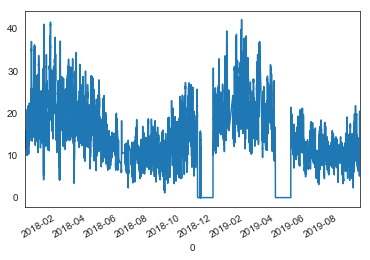

In [29]:
df_weather.AvgTemp.plot()

## Create Monthly files

In [25]:
### Some of the data are missing in the raw data --- > need to combine using the data received through telemetry
dfmtview=df_mtview[(df_mtview.index>='2019-01-01')]

In [26]:
dfmtview.head()

,1,2,3,4,5,6,7,8,9,10,...,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116
0,,,,,,,,,,,,,,,,,,,,,
2019-04-09 14:12:00,843917,17.99471,13.49577,15.0,45.0,1000.9,175.18,37330,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2019-04-09 14:12:30,843918,18.04667,13.65631,15.0,45.0,1000.9,175.18,37330,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2019-04-09 14:13:00,843919,18.07152,14.08255,14.9,45.5,1000.9,175.18,37330,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2019-04-09 14:13:30,843920,18.09637,13.44042,14.9,45.5,1000.9,175.18,37330,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2019-04-09 14:14:00,843921,18.14833,14.00505,14.8,45.9,1000.9,175.18,37330,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfgroup=dfmtview.groupby(dfmtview.index.month)
for i in range(4,13):
    print i
    dfgroup.get_group(i).to_csv('2019_'+str(i).zfill(2)+'_MtView.csv')

In [32]:
### To merge files
os.chdir(r'G:\My Drive\PhD_related\Article_4\data_analysis\raw_data\mtview\to_merge')
f1=pd.read_csv('2019_04_MtView.csv',parse_dates=True,index_col=[0],low_memory=False)
f2=pd.read_csv('2019_04_MtView_.csv',parse_dates=True,index_col=[0],low_memory=False)

In [33]:
df=pd.DataFrame()
df=df.append(f1,sort=True)
df=df.append(f2,sort=True)
df=df[~df.index.duplicated(keep='first')]

In [34]:
df.to_csv('2019_04_MtView(1).csv')

## Apply theoretical Filter for N(d) field using pydsd package

In [3]:
os.chdir(r'G:\My Drive\PhD_related\Article_4\data_analysis\raw_data\mtview')
disdro_files=glob.glob('*MtView*.csv')
all_result=pd.DataFrame()
for f_dsd in range(0,len(disdro_files)):
    print disdro_files[f_dsd]
    print '----------------------------------------'
    dsd=pydsd.read_OTT_MtView(disdro_files[f_dsd])
    res=dsd.save_raw_result()
    all_result=all_result.append(res)

all_result.to_csv('Result_raw_Nd_MtView#.dat')
print 'Done...'

2018_01_MtView.csv
----------------------------------------
2018_02_MtView.csv
----------------------------------------
2018_03_MtView.csv
----------------------------------------
2018_04_MtView.csv
----------------------------------------
2018_05_MtView.csv
----------------------------------------
2018_06_MtView.csv
----------------------------------------
2018_07_MtView.csv
----------------------------------------
2018_08_MtView.csv
----------------------------------------
2018_09_MtView.csv
----------------------------------------
2018_10_MtView.csv
----------------------------------------
2019_05_MtView.csv
----------------------------------------
2019_06_MtView.csv
----------------------------------------
2019_07_MtView.csv
----------------------------------------
2019_08_MtView.csv
----------------------------------------
2019_09_MtView.csv
----------------------------------------
2018_12_MtView_.csv
----------------------------------------
2019_01_MtView_.csv
-------------------

C:\ProgramData\Anaconda2\lib\site-packages\pydsd\io\OTTreaderMtView.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nd[(nd>=-9.999)&(nd<=0)]=0
C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


2019_04_MtView(1).csv
----------------------------------------
2017_12_MtView.csv
----------------------------------------
Done...


## Derive attenuation for 24GHz
Parameter used : CA = 20 deg and Shape model of Beard and Chuang

In [2]:
os.chdir(r'G:\My Drive\PhD_related\Article_4\data_analysis\raw_data\mtview')

In [3]:
filename='Result_raw_Nd_MtView#.dat'
dsd=pydsd.read_OTT(filename)
dsd.apply_filter()
dsd.calculate_RR()
dsd.set_scattering_temperature_and_frequency(scattering_freq=24e9)
dsd.cantangle=20
dsd.calculate_radar_parameters()  #option 1 -->Beard and Chuang(Default in pydsd)
result=dsd.save_result()
result.to_csv('Result_MtView_24GHz#_1.dat')

4.368366666666667
2274.0985666666666
Calculating RR


C:\ProgramData\Anaconda2\lib\site-packages\pydsd\DropSizeDistribution.py:243: RuntimeWarning: divide by zero encountered in log10
  self.fields['Zh']['data'][t] = 10*np.log10(radar.refl(self.scatterer))
C:\ProgramData\Anaconda2\lib\site-packages\pytmatrix\radar.py:78: RuntimeWarning: invalid value encountered in double_scalars
  return radar_xsect(scatterer, True)/radar_xsect(scatterer, False)


## Derive attenuation for 38 GHz

filename='Result_raw_Nd_MtView#.dat'
dsd=pydsd.read_OTT(filename)
dsd.apply_filter()
dsd.calculate_RR()
dsd.set_scattering_temperature_and_frequency(scattering_freq=38e9)
dsd.cantangle=20
dsd.calculate_radar_parameters(dsr_func=dsd.select_dsr_fun(option=1))  #option 1 -->Beard and Chuang(Default in pydsd)
result=dsd.save_result()
result.to_csv('Result_MtView_38GHz#.dat')

## Derive attenuation for Motorola link (Same experimental link path) Frequency : 22715 GHz

In [5]:
filename='Result_raw_Nd_MtView#.dat'
dsd=pydsd.read_OTT(filename)
dsd.apply_filter()
dsd.calculate_RR()
dsd.set_scattering_temperature_and_frequency(scattering_freq=22.715e9)
dsd.cantangle=20
dsd.calculate_radar_parameters(dsr_func=dsd.select_dsr_fun(option=1))  #option 1 -->Beard and Chuang(Default in pydsd)
result=dsd.save_result()
result.to_csv('Result_MtView_22GHz#.dat')

Calculating RR
<function bc at 0x000000000A5475F8>
20


## Derive attenuation for Frequency 15.299 GHZ (LINK ID 49)

filename='Result_raw_Nd_MtView#.dat'
dsd=pydsd.read_OTT(filename)
dsd.apply_filter()
dsd.calculate_RR()
dsd.set_scattering_temperature_and_frequency(scattering_freq=15.299e9)
dsd.cantangle=20
dsd.calculate_radar_parameters(dsr_func=dsd.select_dsr_fun(option=1))  #option 1 -->Beard and Chuang(Default in pydsd)
result=dsd.save_result()
result.to_csv('Result_MtView_15GHz#.dat')

## Derive attenuation for Frequency 19.39 GHz (LINK ID 7)

filename='Result_raw_Nd_MtView#.dat'
dsd=pydsd.read_OTT(filename)
dsd.apply_filter()
dsd.calculate_RR()
dsd.set_scattering_temperature_and_frequency(scattering_freq=19.39e9)
dsd.cantangle=20
dsd.calculate_radar_parameters(dsr_func=dsd.select_dsr_fun(option=1))  #option 1 -->Beard and Chuang(Default in pydsd)
result=dsd.save_result()
result.to_csv('Result_MtView_19GHz#.dat')

## Function for Power law fit

In [4]:
from scipy.optimize import curve_fit
def expfit(x, y):
    '''
    expfit calculates an exponential power law fit based upon levenburg-marquardt minimization. Fits
    are of the form. y = ax**b
    Parameters:
    -----------
    x: array_like
        independent variable
    y: array_like
        dependent variable

    Returns:
    --------
    popt : tuple
        Scale and exponential parameters a & b
    pcov: tuple
        Covariance of the fit

    Notes:
    ------
    There are some stability issues if bad data is passed into it.

    '''

    x_array = np.array(x)
    y_array = np.array(y)

    x_finite_index = np.isfinite(x_array)
    y_finite_index = np.isfinite(y_array)

    mask = np.logical_and(x_finite_index, y_finite_index)

    expfunc = lambda x, a, b: a * np.power(x, b)
    popt, pcov= curve_fit(expfunc, x_array[mask], y_array[mask])
    
    residuals=y_array[mask]-expfunc(x_array[mask],popt[0],popt[1])
    ss_res=np.sum(residuals**2)
    ss_tot=np.sum((y_array[mask]-np.mean(y_array[mask]))**2)
    r_squared=1-(ss_res/ss_tot)
    return popt, r_squared


## Plot result for Attenuation vs rainfall intensity

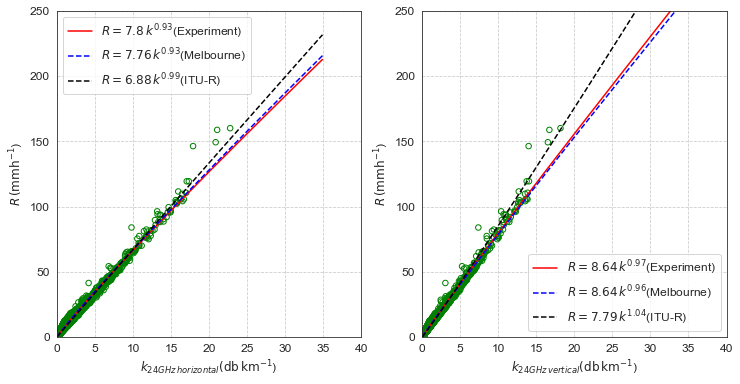

In [6]:
##Rain Intensity Vs specific attenuation plot 
k=np.arange(0,35,0.1)
mtview_df=pd.read_csv('Result_MtView_24GHz#_1.dat',low_memory=False,parse_dates=True,index_col=[0])
fig,axs=plt.subplots(ncols=2,figsize=(12,6),sharey=False)
ax=axs[0]
ax.scatter(mtview_df.AiH,mtview_df['Rain rate'],facecolors='none',s=30,edgecolors='g')
ax.set_xlabel(r'$k_{24GHz\/horizontal}(\rm db\/ km^{-1}$)',fontsize=12)
ax.set_ylabel(r'$R\/ (\rm mm h^{-1}$)',fontsize=12)
pc,pv=expfit(mtview_df.AiH,mtview_df['Rain rate'])
ax.plot(k,pc[0]*k**pc[1],color='red')
ax.plot(k,7.76*k**0.936,color='blue',linestyle='--')
ax.plot(k,6.88*k**0.99,color='black',linestyle='--')
ax.grid(linestyle='--')
ax.set_ylim(0,250)
ax.set_xlim(0,40)
ax.tick_params(labelsize=12)
ax.legend([r'$R='+str(round(pc[0],2))+'\/k^{'+str(round(pc[1],2))+'}$(Experiment)',r'$R=7.76\/k^{0.93}$(Melbourne)',r'$R=6.88\/k^{0.99}$(ITU-R)'],fontsize=12,loc=4)


ax=axs[1]
ax.scatter(mtview_df.AiV,mtview_df['Rain rate'],facecolors='none',s=30,edgecolors='g')
ax.set_xlabel(r'$k_{24GHz\/ vertical}(\rm db\/ km^{-1}$)',fontsize=12)
ax.set_ylabel(r'$R\/ (\rm mm h^{-1}$)',fontsize=12)
pc,pv=expfit(mtview_df.AiV,mtview_df['Rain rate'])
ax.plot(k,pc[0]*k**pc[1],color='red')
ax.plot(k,8.64*k**0.96,color='blue',linestyle='--')
ax.plot(k,7.79*k**1.04,color='black',linestyle='--')
ax.tick_params(labelsize=12)
ax.legend([r'$R='+str(round(pc[0],2))+'\/k^{'+str(round(pc[1],2))+'}$(Experiment)',r'$R=8.64\/k^{0.96}$(Melbourne)',r'$R=7.79\/k^{1.04}$(ITU-R)'],fontsize=12)
ax.grid(linestyle='--')
ax.grid(linestyle='--')
ax.set_ylim(0,250)
ax.set_xlim(0,40)
fig.savefig('Experiment_MtView_k_r.pdf')

## Z-R relationship

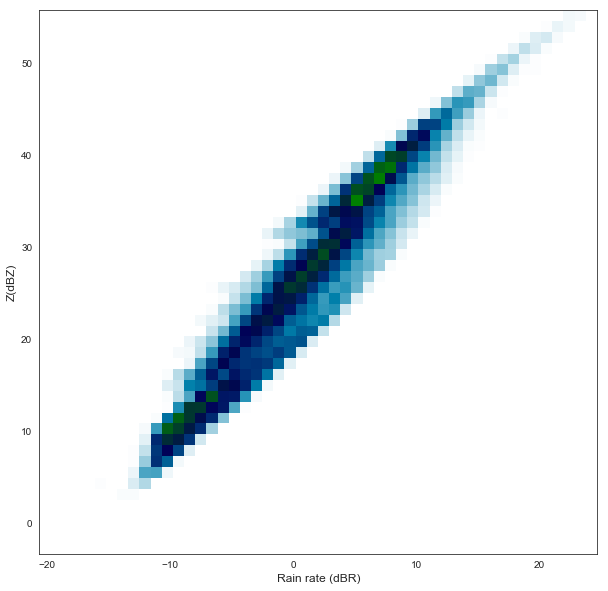

In [9]:
mtview_df=pd.read_csv('Result_MtView_24GHz#.dat',low_memory=False,parse_dates=True,index_col=[0])

fig,ax=plt.subplots(figsize=(10,10))
plt.hist2d(10*np.log10(mtview_df['Rain rate']),mtview_df['Zh'],(50,50),cmap='ocean_r')
ax.set_xlabel('Rain rate (dBR)',fontsize=12)
ax.set_ylabel('Z(dBZ)',fontsize=12)
plt.show()

In [7]:
mtview_df.head()

,Rain rate,Zh,Zdr,Kdp,AiH,AiV,Freq
2018-01-02 22:06:00,0.126392,11.696527,0.123267,0.005030,0.009283,0.009115,2.400000e+10
2018-01-02 22:06:30,0.152221,12.494249,0.118527,0.006120,0.011126,0.010925,2.400000e+10
2018-01-02 22:07:00,0.175452,12.060686,0.088343,0.005718,0.012115,0.011946,2.400000e+10
2018-01-02 22:07:30,0.070677,8.302457,0.101550,0.002341,0.004961,0.004889,2.400000e+10
2018-01-02 22:10:30,0.058258,7.700192,0.099187,0.002080,0.004105,0.004041,2.400000e+10


In [10]:
df_rain=pd.read_csv('Result_raw_Nd_MtView#.dat',parse_dates=True,index_col=[0])